# 머신러닝_회귀

학습 횟수 :  0


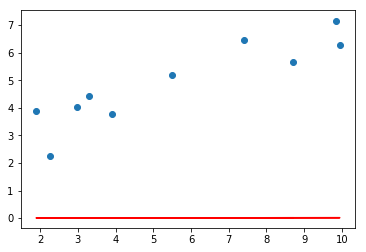

학습 횟수 :  200


<Figure size 432x288 with 0 Axes>

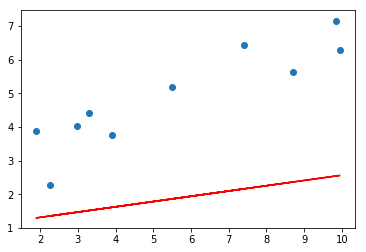

학습 횟수 :  400


<Figure size 432x288 with 0 Axes>

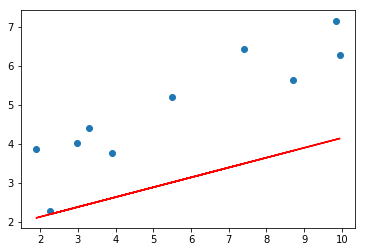

학습 횟수 :  600


<Figure size 432x288 with 0 Axes>

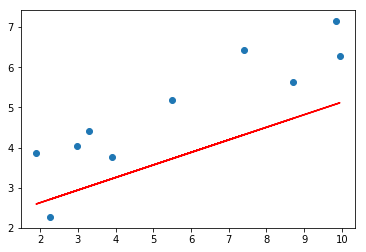

학습 횟수 :  800


<Figure size 432x288 with 0 Axes>

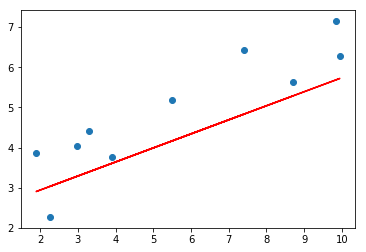

학습 횟수 :  1000


<Figure size 432x288 with 0 Axes>

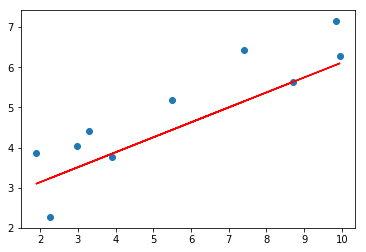

학습 횟수 :  1200


<Figure size 432x288 with 0 Axes>

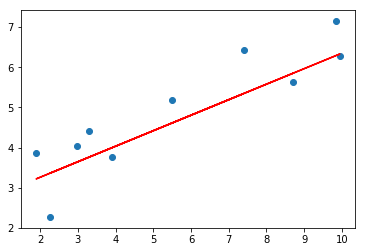

학습 횟수 :  1400


<Figure size 432x288 with 0 Axes>

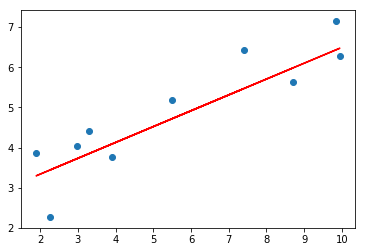

학습 횟수 :  1600


<Figure size 432x288 with 0 Axes>

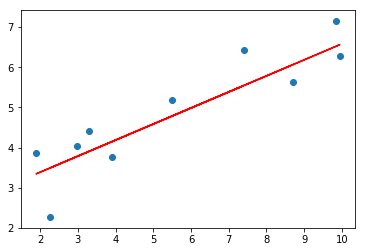

학습 횟수 :  1800


<Figure size 432x288 with 0 Axes>

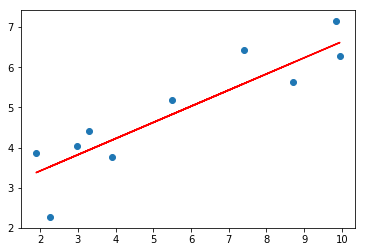

학습 횟수 :  2000


<Figure size 432x288 with 0 Axes>

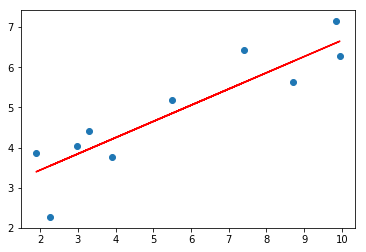

학습 횟수 :  2200


<Figure size 432x288 with 0 Axes>

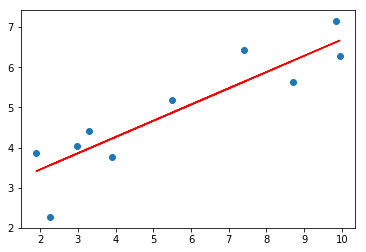

학습 횟수 :  2400


<Figure size 432x288 with 0 Axes>

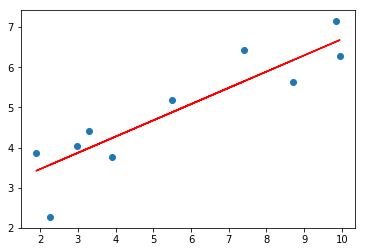

학습 횟수 :  2600


<Figure size 432x288 with 0 Axes>

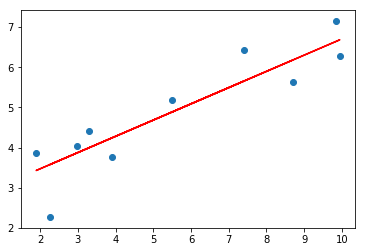

학습 횟수 :  2800


<Figure size 432x288 with 0 Axes>

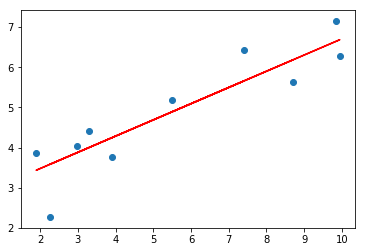

학습 횟수 :  3000


<Figure size 432x288 with 0 Axes>

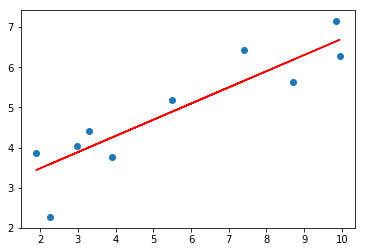

학습 횟수 :  3200


<Figure size 432x288 with 0 Axes>

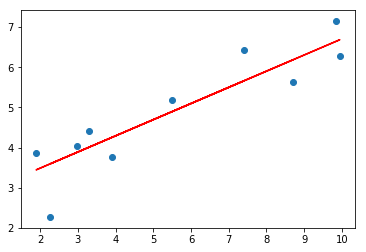

학습 횟수 :  3400


<Figure size 432x288 with 0 Axes>

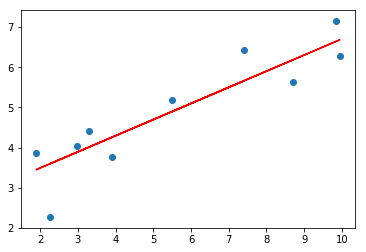

학습 횟수 :  3600


<Figure size 432x288 with 0 Axes>

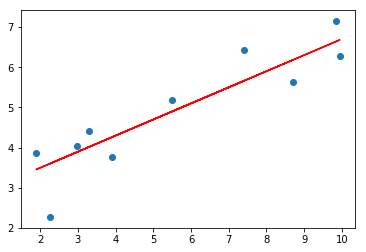

학습 횟수 :  3800


<Figure size 432x288 with 0 Axes>

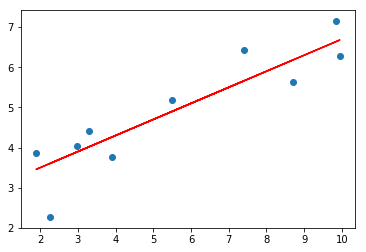

학습 횟수 :  4000


<Figure size 432x288 with 0 Axes>

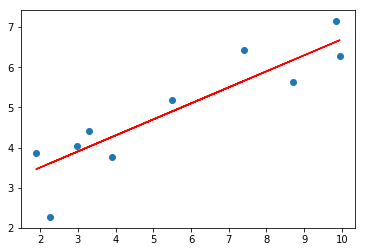

학습 횟수 :  4200


<Figure size 432x288 with 0 Axes>

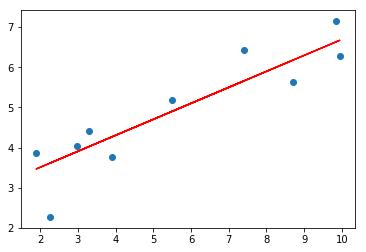

학습 횟수 :  4400


<Figure size 432x288 with 0 Axes>

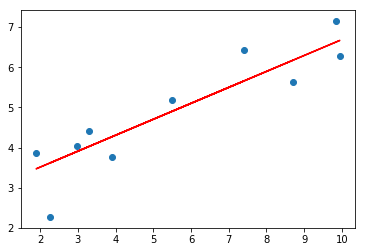

학습 횟수 :  4600


<Figure size 432x288 with 0 Axes>

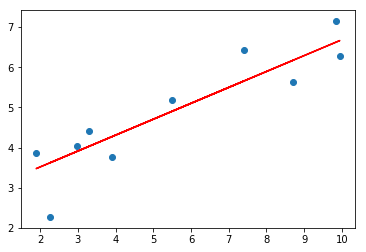

학습 횟수 :  4800


<Figure size 432x288 with 0 Axes>

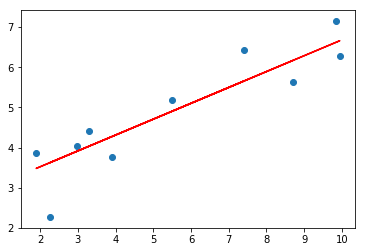

5000번의 학습 이후의 회귀 알고리즘 결과
beta_0:  [2.73807555] beta_1 [0.39410904]


<Figure size 432x288 with 0 Axes>

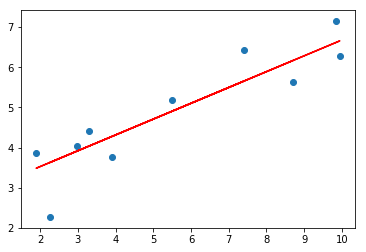

<Figure size 432x288 with 0 Axes>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def load_data():
    X = np.array([[8.70153760], [3.90825773], [1.89362433], [3.28730045], [7.39333004], 
                       [2.98984649], [2.25757240], [9.84450732], [9.94589513], [5.48321616]])
    y = np.array([[5.64413093], [3.75876583], [3.87233310], [4.40990425], [6.43845020],
            [4.02827829], [2.26105955], [7.15768995], [6.29097441], [5.19692852]])
    return X,y


def prediction(beta_0, beta_1, X):
    pred_y = beta_0 + beta_1 * X
    return pred_y

# beta_1와 beta_0 값을 업데이트 하는 규칙을 정의하는 함수
def update_beta(beta_0, beta_1,X,loss,lr):
    
    delta_0 = -(lr*(2/len(loss)) * (np.dot(X.T, loss)))
    delta_1 = -(lr*(2/len(loss))* np.sum(loss))
    
    return delta_0, delta_1
"""
1. 반복 횟수만큼 오차(loss)를 계산하고
   beta_0, beta_1의 값을 변경하는 함수를 구현
   
   Step01. 실제 값 y와 prediction 함수를 통해 예측한
   예측값 pred_y 간의 차이(loss)를 계산 
   
   loss는 실제값(y) - 예측값(pred_y)으로 정의
   
   Step02. 구현된 함수를 이용하여
   beta_0와 beta_1의 변화값을 각각 beta0_delta, beta1_delta에 저장
"""
def gradient_descent(X, y, iters, lr):
    beta_0 = np.zeros((1,1))
    beta_1 = np.zeros((1,1))
    
    for i in range(iters):
        loss = y - prediction(beta_0, beta_1, X)
        
        beta0_delta, beta1_delta = update_beta(beta_0, beta_1, X, loss, lr)
        
        beta_0 -= beta0_delta
        beta_1 -= beta1_delta
        
        if i % 200 == 0:
            print("학습 횟수 : ", i)
            plotting_graph(X,y,beta_0, beta_1)
            
    return beta_0, beta_1
            
# 그래프를 시각화하는 함수
def plotting_graph(X,y,beta_0, beta_1):
    
    y_pred = beta_0 + beta_1[0,0]* X
    
    fig = plt.figure()
    plt.scatter(X,y)
    plt.plot(X, y_pred,c='r')
    plt.show()
    plt.savefig('test.png')
    
    
    
def main():
    #print("main")
    # 학습을 위해 필요한 파리미터 정의
    lr = 1e-4
    iteration = 5000
    
    X,y = load_data()
    
    # y = beta_0 + beta_1 * x
    beta_0, beta_1  = gradient_descent(X,y, iteration,lr)
    
    print("{}번의 학습 이후의 회귀 알고리즘 결과".format(iteration))
    print("beta_0: ", beta_0[0], "beta_1",beta_1[0])
    
    plotting_graph(X,y,beta_0,beta_1)
    
if __name__ == '__main__':
    main()

(70, 1) (30, 1) (70, 1) (30, 1)
> beta_0 : [2.89804615]
> beta_1 : [[2.90298892]]
> 모델 평가 점수 : 0.8948735905242706


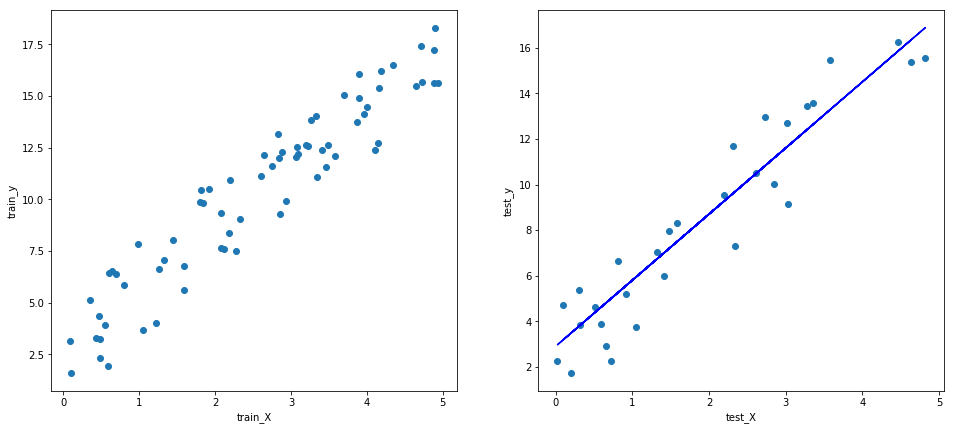

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터를 분리하는 모듈을 불러옵니다.
from sklearn.model_selection import train_test_split

# 사이킷런에 구현되어 있는 회귀 모델을 불러옵니다.
from sklearn.linear_model import LinearRegression

'''
1.  데이터를 생성하고,
    생성한 데이터를
    학습용 데이터와 테스트용 데이터로 분리하여
    반환하는 함수 구현
    
    학습용 데이터는 전체 70%
    테스트용 데이터는 나머지 30%

'''
def load_data():
    np.random.seed(0)
    
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)
    print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)
    
    return train_X, test_X, train_y, test_y
'''
2.  단순 선형회귀 모델을 불러오고,
    불러온 모델을 학습 데이터에
    맞추어 학습시킨 후
    테스트 데이터에 대한
    예측값을 반환하는 함수 구현
    
    Step01. 사이킷런에 구현되어 있는
            단순 선형회귀 모델을 불러옵니다.
            
    Step02. 불러온 모델을 학습용 데이터에 맞춰 학습시킵니다.
            
'''
    
def regression_model(train_X, train_y):
    simplelinear = LinearRegression()
    simplelinear.fit(train_X, train_y) # fit : 학습
    return simplelinear

'''
3. 모델 학습 및 예측 결과 확인을 위한
    main()함수를 구현
    
    Step01. 학습이 완료된 모델을 활용하여
            테스트 데이터에 대한 예측을 수행
            
    Step02. 사이킷런 회귀 모델 내에 구현되어 있는
            score 함수를 사용하여 모델 학습 평가
            점수를 model_score 변수에 저장
            
    Step03. 학습된 모델의 beta_0와 beta_1를
            각각 변수 beta_0와 beta_1에 저장
'''

def main():
    
    train_X, test_X, train_y, test_y = load_data()
    simplelinear = regression_model(train_X, train_y)
    predicted = simplelinear.predict(test_X)
    model_score = simplelinear.score(test_X, test_y)
    
    beta_0 = simplelinear.intercept_
    beta_1 = simplelinear.coef_
    
    print('> beta_0 :', beta_0)
    print('> beta_1 :', beta_1)
    
    print('> 모델 평가 점수 :', model_score)
    
    # 시각화 함수 호출
    plotting_graph(train_X, test_X, train_y, test_y, predicted)
    
def plotting_graph(train_X, test_X, train_y, test_y, predicted):
    fig, ax = plt.subplots(1,2, figsize=(16,7))
    
    ax[0].scatter(train_X, train_y)
    ax[1].scatter(test_X, test_y)
    ax[1].plot(test_X, predicted, color='b')
    
    ax[0].set_xlabel('train_X')
    ax[0].set_ylabel('train_y')
    ax[1].set_xlabel('test_X')
    ax[1].set_ylabel('test_y')
    
if __name__ == '__main__':
    main()

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# boston 데이터를 위한 모듈
from sklearn.datasets import load_boston

'''
1.  사이킷런에 존재하는 데이터를 불러오고,
    불러온 데이터를 학습용 데이터와 테스트용 데이터로
    분리하여 반환하는 함수 구현
    Step01 
'''

def load_data():
    
    X,y = load_boston(return_X_y = True)
    
    print('데이터의 입력값(X)의 개수 :', X.shape)
    
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2, random_state=100)
    print(train_X.shape, test_X.shape)
    return train_X, test_X, train_y, test_y
'''
2.  다중 선형회귀 모델을 불러오고,
    불러온 모델을 학습용 데이터에 맞추어 학습시킨 후
    해당 모델을 반환하는 함수 구현
    
    Step01. 사이킷런에 구현되어 있는
            다중 선형회귀 모델을 불러온다.
            
    Step02. 불러온 모델을 학습용 데이터에 맞춰 학습시킨다.
    
    Step03. 학습된 모델의 beta_0와 beta_1를
            각각 변수 beta_0와 beta_1에 저장
'''

def Multi_Regression(train_X, train_y):
    multilinear = LinearRegression()
    multilinear.fit(train_X, train_y)
    return multilinear

'''
3. 모델 학습 및 예측 결과 확인을 위한
    main()함수를 구현
    
    Step01. 학습이 완료된 모델을 활용하여
            테스트 데이터에 대한 예측을 수행
            
    Step02. 사이킷런 회귀 모델 내에 구현되어 있는
            score 함수를 사용하여 모델 학습 평가
            점수를 model_score 변수에 저장
            
    Step03. 학습된 모델의 beta_0와 beta_1를
            각각 변수 beta_0와 beta_1에 저장
'''

def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    multilinear = Multi_Regression(train_X, train_y)
    
    predicted = multilinear.predict(test_X)
    
    model_score = multilinear.score(test_X, test_y)
    
    print('\n> 모델 평가 점수 :', model_score)
    
    beta_0 = multilinear.intercept_
    beta_i_list = multilinear.coef_
    
    print('\n beta_0 :', beta_0)
    print('> beta_i_list :', beta_i_list)
    
if __name__ == '__main__':
    main()

데이터의 입력값(X)의 개수 : (506, 13)
(404, 13) (102, 13)

> 모델 평가 점수 : 0.7555033086871306

 beta_0 : 36.33377028550793
> beta_i_list : [-8.14896492e-02  4.80407782e-02 -5.47150249e-03  3.06260576e+00
 -1.61368815e+01  3.67245067e+00 -8.51525259e-03 -1.51740854e+00
  2.87271007e-01 -1.21207598e-02 -9.24160757e-01  9.53460812e-03
 -4.85895548e-01]


(50, 1) (50, 1)


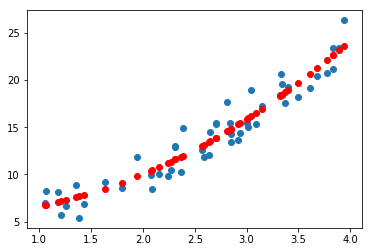

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 다항 회귀의 입력값을 변화하기 위한 모듈
from sklearn.preprocessing import PolynomialFeatures

def load_data():
    np.random.seed(0)
    X = 3*np.random.rand(50,1) + 1
    y = X**2 + X + 2 + 5*np.random.rand(50,1)
    print(X.shape, y.shape)
    return X,y

def Polynomial_transform(X):
    poly_feat = PolynomialFeatures(degree=2, include_bias=True)
    #print('X :', X[:3])
    poly_X = poly_feat.fit_transform(X)
    #print('변환 이후 X 데이터\n','[X^0, X^1, X^2]\n', poly_X[:3])
    return poly_X

def Multi_Regression(poly_x, y):
    multilinear = LinearRegression()
    multilinear.fit(poly_x, y)
    
    return multilinear

def plotting_graph(x,y,predicted):
    fig = plt.figure()
    plt.scatter(x,y)
    
    plt.scatter(x, predicted, c='r')

def main():
    X,y = load_data()
    poly_x = Polynomial_transform(X)
    
    linear_model = Multi_Regression(poly_x, y)
    predicted = linear_model.predict(poly_x)
    
    plotting_graph(X, y, predicted)
    
if __name__ == '__main__':
    main()

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# sklearn kFold 모듈
from sklearn.model_selection import KFold

def load_data():
    X,y = load_boston(return_X_y = True)
    print(X.shape, y.shape)
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state=100)
    return train_X, test_X, train_y, test_y

'''
2.  k-fold 교차 검증을 통한
    모델 학습 및 예측 수행을 진행할 함수
    
    Step01. 전체 데이터를 5개로 분리할 수 있도록 KFold 객체를 정의한다.
    
    Step02. 정의한 KFold 객체와 .split()함수를 이용하여
            학습용 데이터 내에서 다시
            학습용(Train) 데이터와 검증용(Validation) 데이터를 나누어
            각각 X_train, X_val, y_train, y_val에 저장
            
            train_idx와 val_idx는 분리된 데이터들의 인덱스이다.
            
    Step03. 분리한 학습용 데이터로 모델을 학습시키고,
            검증용 데이터로 모델을 평가하여
            각 데이터에 대한 모델 평가 점수를 score 변수에 저장한다.
'''

def kfold_regression(train_X, train_y):
    
    model = LinearRegression()
    
    # 반복문 내에서 횟수를 표시하기 위한 변수
    n_iter = 0
    
    # 각 fold 마다 모델 검증 점수를 저장하기 위한 빈 리스트 생성
    model_scores = []
    
    kfold = KFold(n_splits=5)
    
    for train_idx, val_idx in kfold.split(train_X):
        X_train, X_val = train_X[train_idx], train_X[val_idx]
        y_train, y_val = train_y[train_idx], train_y[val_idx]
        model.fit(X_train, y_train)
        
        # 각 Iter 별 모델 평가 점수 측정
        score = model.score(X_val, y_val)
        
        # 학습용 데이터의 크기를 저장
        train_size = X_train.shape[0]
        val_size = X_val.shape[0]
        print("Iter : {0} Cross-Validation Accuracy : {1}, Train Data 크기 : {2}, \
        Validation Data 크기: {3}".format(n_iter, score, train_size, val_size))
        n_iter += 1
        
        # 전체 모델 점수를 저장하는 리스트에 추가하기
        model_scores.append(score)
    return kfold, model, model_scores

def main():
    
    # 학습용 데이터와 테스트 데이터 불러오기
    train_X, test_X, train_y, test_y = load_data()
    
    # KFold 교차 검증을 통한 학습 결과와 회귀 모델을 반환하는 함수
    kfold, model, model_scores = kfold_regression(train_X, train_y)
    
    # 전체 성능 점수의 평균 점수 출력
    print('\n> 평균 검증 모델 점수 :', np.mean(model_scores))
    
    # 테스트 데이터에 대한 모델 성능 점수 출력
    print('> 테스트 데이터 모델 점수 :', model.score(test_X, test_y))
    
    
if __name__ == '__main__':
    main()

(506, 13) (506,)
Iter : 0 Cross-Validation Accuracy : 0.6225277546797328, Train Data 크기 : 323,         Validation Data 크기: 81
Iter : 1 Cross-Validation Accuracy : 0.7158099616179285, Train Data 크기 : 323,         Validation Data 크기: 81
Iter : 2 Cross-Validation Accuracy : 0.7986314390280341, Train Data 크기 : 323,         Validation Data 크기: 81
Iter : 3 Cross-Validation Accuracy : 0.6952286567450783, Train Data 크기 : 323,         Validation Data 크기: 81
Iter : 4 Cross-Validation Accuracy : 0.700695753685302, Train Data 크기 : 324,         Validation Data 크기: 80

> 평균 검증 모델 점수 : 0.7065787131512152
> 테스트 데이터 모델 점수 : 0.7572608014205964


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Ridge 회귀의 beta_i
 NOX       -2.371619
DIS       -1.248808
PTRATIO   -0.797945
LSTAT     -0.559366
CRIM      -0.101435
INDUS     -0.042962
TAX       -0.013993
AGE       -0.010707
B          0.010037
ZN         0.049579
RAD        0.279596
CHAS       1.952021
RM         3.702272
dtype: float64
Lasso 회귀의 beta_i
 LSTAT     -0.564038
TAX       -0.009282
CRIM      -0.000000
INDUS     -0.000000
CHAS       0.000000
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS       -0.000000
RAD        0.000000
PTRATIO   -0.000000
B          0.007496
ZN         0.026146
dtype: float64


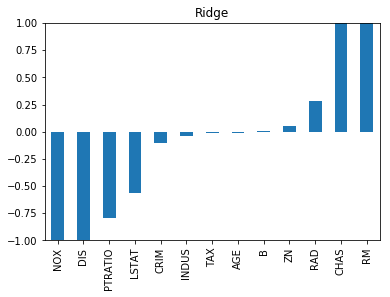

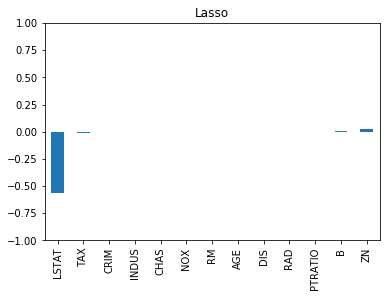

In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.datasets import load_boston

def load_data():
    X,y = load_boston(return_X_y = True)
    feature_names = load_boston().feature_names
    print(feature_names) # 컬럼명이라 생각하면 될 듯
    return X,y,feature_names

def Ridge_regression(X,y):
    ridge_reg = Ridge(alpha=10)
    ridge_reg.fit(X,y)
    return ridge_reg

def Lasso_regression(X,y):
    lasso_reg = Lasso(alpha=10)
    lasso_reg.fit(X,y)
    return lasso_reg
    
def main():
    X,y,feature_names = load_data()
    
    ridge_reg = Ridge_regression(X,y)
    lasso_reg = Lasso_regression(X,y)
    
    # Ridge 회귀의 beta_i의 크기를 저장
    ridge_coef = pd.Series(ridge_reg.coef_, feature_names).sort_values()
    print('Ridge 회귀의 beta_i\n', ridge_coef)
    
    # Lasso 회귀의 beta_i의 크기를 저장
    lasso_coef = pd.Series(lasso_reg.coef_, feature_names).sort_values()
    print('Lasso 회귀의 beta_i\n', lasso_coef)
    
    plot_graph(ridge_coef, 'Ridge')
    plot_graph(lasso_coef, 'Lasso')
    
def plot_graph(coef, title):
    fig = plt.figure()
    
    plt.ylim(-1,1)
    plt.title(title)
    coef.plot(kind='bar')
    
    
if __name__ == '__main__':
    main()

## ElasticNet --- p. 

ElasticNet 회귀의 평가 점수 : 0.7360376918508502

ElasticNet 회귀의 beta_i
 DIS       -1.243926
PTRATIO   -0.790742
LSTAT     -0.564644
NOX       -0.246768
CRIM      -0.076200
INDUS     -0.056845
TAX       -0.015318
AGE       -0.014303
B          0.009831
ZN         0.054203
RAD        0.283284
CHAS       1.248927
RM         2.961286
dtype: float64


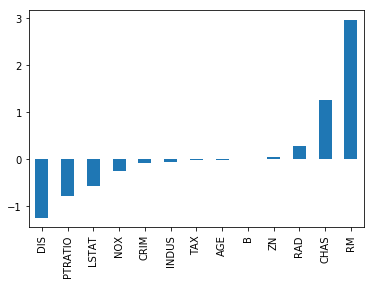

In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

def load_data():
    
    X,y = load_boston(return_X_y = True)
    feature_names = load_boston().feature_names
    return X,y,feature_names

def ElasticNet_regression(train_X, train_y):
    ElasticNet_reg = ElasticNet()
    
    # ElasticNet_reg = ElasticNet(alpha=0.1)
    ElasticNet_reg = ElasticNet(alpha=0.1, l1_ratio=0.3)
    
    ElasticNet_reg.fit(train_X, train_y)
    return ElasticNet_reg
    
def plot_graph(coef):
    coef.plot(kind='bar')
    
def main():
    X,y, feature_names = load_data()
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2, random_state=100)
    
    elasticnet_reg = ElasticNet_regression(train_X, train_y)
    score = elasticnet_reg.score(test_X, test_y)
    print('ElasticNet 회귀의 평가 점수 :', score)
    
    ElasticNet_coef = pd.Series(elasticnet_reg.coef_, feature_names).sort_values()
    print('\nElasticNet 회귀의 beta_i\n', ElasticNet_coef)
    
    plot_graph(ElasticNet_coef)
    
if __name__ == '__main__':
    main()

In [ ]:
## 06 회귀 알고리즘 평가 지표 --- p.38

>RSS : [62.6719913]


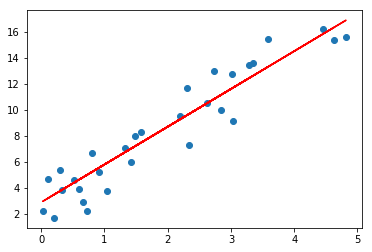

In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def load_data():
    np.random.seed(0)
    
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)
    
    return train_X, test_X, train_y, test_y

def Linear_Regression(train_X, train_y):
    lr = LinearRegression()
    lr.fit(train_X, train_y)
    return lr

def return_RSS(test_y, predicted):
    RSS = 0
    for i in range(len(test_y)):
        RSS += (test_y[i] - predicted[i]) ** 2
        
    return RSS

def main():
    train_X, test_X, train_y, test_y = load_data()
    
    lr = Linear_Regression(train_X, train_y)
    
    predicted = lr.predict(test_X)
    RSS = return_RSS(test_y, predicted)
    print('>RSS :', RSS)
    
    plotting_graph(test_X, test_y, predicted)
        
def plotting_graph(test_X, test_y, predicted):
    plt.scatter(test_X, test_y)
    plt.plot(test_X, predicted, color='r')
    
if __name__ == '__main__':
    main()

## MAE, MSE

> MAE : 1.220841984510205
> MSE : 2.0890663766577946


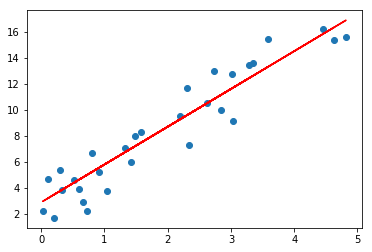

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def load_data():
    np.random.seed(0)
    
    X = 5* np.random.rand(100,1)
#     print(X.shape)
    y = 3*X + 5*np.random.rand(100,1)
    
    train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=0)
    
    return train_X, test_X, train_y, test_y

def Linear_Regression(train_X, train_y):
    lr = LinearRegression()
    lr.fit(train_X, train_y)
    return lr

def Mean_absolute_error(test_y, predicted):
    #print(test_y.shape, predicted.shape)
    #MSE = []
    #MSE.append(abs(test_y[0] - predicted[0]))
    #print('MSE[0] :', MSE[0])
    #MSE.append(abs(test_y[1] - predicted[1]))
    MAE = 0
    for i in range(len(predicted)):
        MAE += abs(test_y[i] - predicted[i])
        
    return float(MAE/len(predicted))

def Mean_squared_error(test_y, predicted):
    MSE = 0
    
    # 이렇게 30개(len(predicted))까지 쭉쭉 감
    #MSE += (test_y[0] - predicted[0]) **2
    #MSE += (test_y[1] - predicted[1]) **2
    for i in range(len(predicted)):
        MSE += (test_y[i] - predicted[i]) **2
    
    return float(MSE/len(predicted))
    
def main():
    train_X, test_X, train_y, test_y = load_data()
    lr = Linear_Regression(train_X, train_y)
    predicted = lr.predict(test_X)
    
#     MAE = mean_absolute_error(test_y, predicted)
#     MSE = mean_squared_error(test_y, predicted)
    
    MAE = Mean_absolute_error(test_y, predicted)
    MSE = Mean_squared_error(test_y, predicted)
    print('> MAE :', MAE)
    print('> MSE :', MSE)
    
    plotting_graph(test_X, test_y, predicted)
    
def plotting_graph(test_X, test_y, predicted):
    plt.scatter(test_X, test_y)
    plt.plot(test_X, predicted, color='r')

if __name__ == '__main__':
    main()

## R^2

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import 
def load_data():
    np.random.seed(0)
    
    X = 5* np.random.rand(100,1)
#     print(X.shape)
    y = 3*X + 5*np.random.rand(100,1)
    
    train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=0)
    
    return train_X, test_X, train_y, test_y

def Linear_Regression(train_X, train_y):
    lr = LinearRegression()
    lr.fit(train_X, train_y)
    return lr


    
def main():
    train_X, test_X, train_y, test_y = load_data()
    lr = Linear_Regression(train_X, train_y)
    predicted = lr.predict(test_X)
    
    R_squared = r2_score(test_y, predicted)
    print('>R_squared :', R_squared)

    plotting_graph(test_X, test_y, predicted)
    
def plotting_graph(test_X, test_y, predicted):
    plt.scatter(test_X, test_y)
    plt.plot(test_X, predicted, color='r')

if __name__ == '__main__':
    main()

SyntaxError: invalid syntax (<ipython-input-17-a362361bc02a>, line 10)

# 분류

## 01 분류 개념과 로지스틱 회귀 시그모이드

In [20]:
import math
def sigmoid(x):
    val = 1 / (1+math.exp(-x))
    return val


In [22]:
sigmoid(-0.00000000000000000000001)

0.5

In [38]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

def plot_logistic_regression(model, X_data, y_data):
    plt.figure(1, figsize=(4,3))
    plt.clf()
    plt.scatter(X_data.ravel(), y_data, color='black', zorder=20)
    X_test = np.linspace(-5, 10, 300)
    loss = expit(X_test * model.coef_ + model.intercept_).ravel()
    plt.plot(X_test, loss, color='red', linwidth=3)
    
    ols = linear_model.LinearRegression()
    ols.fit(X_data, y_data)
    plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
    plt.axhline(.5, color='.5')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.yticks([0, 0.5, 1])
    plt.legend(('Logistic Regression Model', 'Linear Regression Model'), loc='lower right', fontsize='small')
    plt.tight_layout()
    plt.show()

X.shape : (100,)
X :
 [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.1

AttributeError: Unknown property linwidth

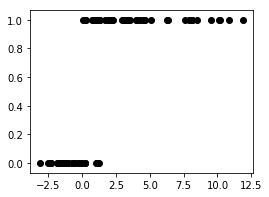

In [41]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

def load_data():
    np.random.seed(0)
    
    X = np.random.normal(size=100) #
    print('X.shape :',X.shape)
    print('X :\n',X,'\n위의 X를 시그모이드함수를 사용해 지연인지(1) 아닌지(0) 분류해 봄')
    y = (X > 0).astype(np.float)
    X[X>0] *= 5
    X += .7 * np.random.normal(size=100)
    print('y :\n',y)
    
    X = X[:, np.newaxis] # 계산하기 편하게 만들어줌
    print(X.shape, y.shape)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=100)
    
    return train_X, test_X, train_y, test_y
    
    

def main():
    #print('main')
    train_X, test_X, train_y, test_y = load_data()
    logistic_model = LogisticRegression()
    logistic_model.fit(train_X, train_y)
    predicted = logistic_model.predict(test_X)
    
    # 예측 결과 확인
    print('예측 결과 확인 :', predicted[:10])
    plot_logistic_regression(logistic_model, train_X, train_y)
    

if __name__ == '__main__':
    main()

## 02 SVM(Support Vector Machine) ---13

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

def load_data():
    data = pd.read_csv('data/dataset.csv')
    #print(data)
    X = data.drop('Class', axis=1) # Factor1~4는 X, Class는 y라서 y 드롭
    #print(X)
    y = data['Class']
    #print(y)
    train_X, test_X, train_y, test_y = train_test_split(X,y)
    #print(X,y)
    return train_X, test_X, train_y, test_y

def SVM(train_X, test_X, train_y, test_y):
    svm = SVC()#SVClass
    svm.fit(train_X, train_y)
    pred_y = svm.predict(test_X)
    return pred_y

def main():
    #print('main')
    train_X, test_X, train_y, test_y = load_data()
    
    pred_y = SVM(train_X, test_X, train_y, test_y)
    
    # SVM 분류 결과값을 출력한다.
    print('\n Confusion matrix : \n', confusion_matrix(test_y, pred_y))
    print('\n Report : \n', classification_report(test_y, pred_y))
    

if __name__ == '__main__':
    main()


 Confusion matrix : 
 [[178   0]
 [  0 165]]

 Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       165

   micro avg       1.00      1.00      1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



## 03 나이브 베이즈 분류 ---19

In [60]:
import numpy as np
'''
1.  "확인"이라는 키워드가 등장했을 때
    해당 메일이 스팸 메일인지 정상 메일인지
    판별하기 위한 함수를 구현하자.
    
                스팸메일          정상메일          개수
"확인"             5                 2                7

나머지             3                10               13

개수               8                12               20

'''

def bayes_theorem():
    # 1. p( "스팸 메일" )의 확률을 구하자
    p_spam = 8/20
    # 2. P( "확인" | "스펨메일" )의 확률을 구하자
    p_confirm_spam = 5/8
    # 3. P( "정상 메일" )의 확률을 구하자
    p_ham = 12/20
    # 4. P( "확인" | "정상메일" )의 확률을 구하자
    p_confirm_ham = 2/12
    # 5. P( "스팸메일" | "확인" )의 확률을 구하자
    #    P( "스팸메일" | "확인" ) = P( "확인" | "스팸메일" ) * P( "스팸메일" ) / P( "확인" ) 
    p_spam_confirm = p_confirm_spam * p_spam / (7/20)
    # 6. P( "정상메일" | "확인" )의 확률을 구하자
    #    P( "정상메일" | "확인" ) = P( "확인" | "정상메일" ) * P( "정상메일" ) / P( "확인" ) 
    p_ham_confirm = p_confirm_ham * p_ham / (7/20)
    
    return 
    
def main():
    #print('main')
    
    if:
        print(round(value[0] * 100, 2), '%의 확률로 일반 메일에 가깝습니다.')
    
    else:
        print(round(value[1] * 100, 2), '%의 확률로 일반 메일에 가깝습니다.')
    

    
if __name__ == '__main__':
    main()

In [72]:
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

'''
Step01. 가우시안 나이브 베이즈 모델을 정의하자.

Step02. 학습용 데이터에 대한 모델을 학습 시키자.

Step03. 테스트 데이터에 대한 모델을 학습 시키자.
'''

def Gaussian_NB(train_X, test_X, train_y, test_y):
    model = GaussianNB()
    model.fit(train_X, train_y)
    predicted = model.predict(test_X)
    
    return predicted, model
    
def load_data():
    X, y = load_wine(return_X_y = True)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)
    #print(X)
    return train_X, test_X, train_y, test_y
    
def main():
    train_X, test_X, train_y, test_y = load_data()
    
    predicted, model = Gaussian_NB(train_X, test_X, train_y, test_y)
    
    #print(test_X[10])
    print('test_X[10] :', model.predict(test_X[10].reshape(1,-1)))
    
    print('Model Accuracy :')
    print(accuracy_score(test_y, predicted))
if __name__ == '__main__':
    main()

test_X[10] : [2]
Model Accuracy :
0.9166666666666666


## 04 KNN(K-Nearest Neighbor) --- 26

In [ ]:
#아아아아아아아ㅏ아아아아아ㅏ아앙 매트릭스 값이 뭔가 이상하다

Confusion matrix :
 [[ 1 18  0]
 [ 0 22  0]
 [ 0 12  1]]
Normalized comfusion matrix :
 [[0.05263158 0.94736842 0.        ]
 [0.         1.         0.        ]
 [0.         0.92307692 0.07692308]]


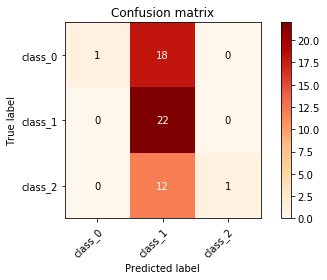

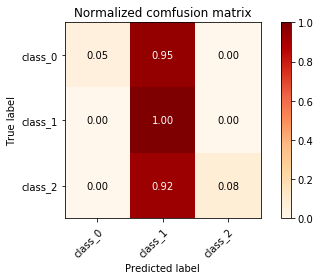

In [51]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import warnings
# warnings.filterwarnings(action='ignore')

def load_data():
    X,y = load_wine(return_X_y = True)
    #print(X,'\n', '-'*50,'\n',y)
    #display(X.shape, y.shape)
    #display('y> ',y)
    class_names = load_wine().target_names
    #display('class_names > ',class_names)
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3, random_state=0)
    #display(X)
    #print(type(load_wine()))
    #print(load_wine().DESCR)
    #print(dir(load_wine))
    
    return train_X, test_X, train_y, test_y, class_names

def main():
    train_X, test_X, train_y, test_y, class_names = load_data()
    
    classifier = SVC()
#     model = classifier.fit(train_X, train_y)
#     y_pred = model.predict(test_X)
    y_pred = classifier.fit(train_X, train_y).predict(test_X) # 예측=공부 
    cm = confusion_matrix(test_y, y_pred) # 확인=시험
    plot_confusion_matrix(cm, test_y, y_pred, classes = class_names) # 시각화
    
    # 정규화 된 혼동 행렬을 시각화
    plot_confusion_matrix(cm, test_y, y_pred, classes=class_names, normalize=True)
    
    return cm
    
def plot_confusion_matrix(cm, y_true, y_pred, classes, normalize=False, cmap=plt.cm.OrRd):
    title=''
    if normalize:
        title = 'Normalized comfusion matrix'
    else:
        title = 'Confusion matrix'
        
#     display('y_pred > ',y_pred)
#     display('unique_labels(y_true,y_pred) > ', unique_labels(y_true,y_pred))
    classes = classes[unique_labels(y_true,y_pred)]
#     display('classes > ', classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(title, ':\n', cm)
    
    fig,ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,yticklabels=classes,
           title = title,
           ylabel = 'True label',
           xlabel = 'Predicted label')
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i, format(cm[i,j],fmt),
                   ha='center', va='center',
                   color='white' if cm[i,j] > thresh else 'black')
    fig.tight_layout()
    
if __name__ == '__main__':
    main()

In [ ]:
# 강사님 코드 그대로 복붙해도 매트릭스 값이 똑같다아아아ㅏㅇ 뭐가 문제일까아아아아아아

Confusion matrix :
 [[ 1 18  0]
 [ 0 22  0]
 [ 0 12  1]]


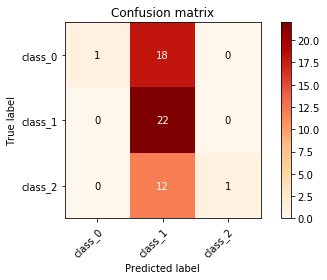

In [47]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def load_data():
    X,y = load_wine(return_X_y =  True)
    #display(X.shape, y.shape)
    #display(y)
    class_names = load_wine().target_names
    #display(class_names)
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3, random_state=0)
    #print(dir(load_wine()))
    
    return train_X, test_X, train_y, test_y, class_names


def main():
    train_X, test_X, train_y, test_y , class_names = load_data()
    
    classifier = SVC()
#    model = classifier.fit(train_X, train_y)
#    y_pred = model.predict(test_X)
    y_pred = classifier.fit(train_X, train_y).predict(test_X)
    cm =confusion_matrix(test_y,y_pred)
    plot_confusion_matrix(cm,test_y,y_pred, classes=class_names)
    return cm
     
def plot_confusion_matrix(cm, y_true, y_pred,classes,normalize=False, cmap=plt.cm.OrRd):
    title = ""
    if normalize:
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix'
    
    #display(y_pred)
    #print(unique_labels(y_true, y_pred))
    classes = classes[unique_labels(y_true, y_pred)]
    #display(classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print(title, ':\n', cm)
    fig,ax = plt.subplots()
    im = ax.imshow(cm,interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im,ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes,yticklabels=classes,
           title = title,
           ylabel = 'True label',
           xlabel = 'Predicted label')
    
    plt.setp(ax.get_xticklabels(),rotation=45,ha='right', rotation_mode='anchor')
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /  2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i, format(cm[i,j], fmt),
                   ha='center', va='center',
                   color='white' if cm[i,j] > thresh else 'black')
    fig.tight_layout()
    
    
    
    

if __name__ == '__main__':
    main()

In [77]:
import pandas as pd

def main():
#     print('main')
    y_true = pd.Series(
        ['not mafia','not mafia','mafia','not mafia','mafia',
         'not mafia','not mafia','mafia','not mafia','not mafia' ]
    )
    # 예측된 값
    y_pred = pd.Series(
        ['mafia','mafia','not mafia','not mafia','mafia',
         'not mafia','not mafia','mafia','not mafia','not mafia' ]
    )
    print('1.혼동행렬:\n', pd.crosstab(y_true, y_pred, rownames=['실제'], colnames=['예측'], margins=True))
    #print(y_true)
    #print(y_pred)
    df = pd.concat([y_true, y_pred], axis=1)
    df.rename(columns={0:'y_true', 1:'y_pred'}, inplace=True)
    print(df)
    
    accuracy = (2+5) / 10  # TP+TN / 전체
    precision = 2 / (2+2)# TP / TP + FP 
    recall = 2 / (2+1) # TP / TP+ FN
    
    print('accuracy :', accuracy)
    print('precision :', precision)
    print('recall :', recall)

if __name__ == '__main__':
    main()

1.혼동행렬:
 예측         mafia  not mafia  All
실제                              
mafia          2          1    3
not mafia      2          5    7
All            4          6   10
      y_true     y_pred
0  not mafia      mafia
1  not mafia      mafia
2      mafia  not mafia
3  not mafia  not mafia
4      mafia      mafia
5  not mafia  not mafia
6  not mafia  not mafia
7      mafia      mafia
8  not mafia  not mafia
9  not mafia  not mafia
accuracy : 0.7
precision : 0.5
recall : 0.6666666666666666
